In [1]:
!pip install --upgrade wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: wandb
    Found existing installation: wandb 0.15.9
    Uninstalling wandb-0.15.9:
      Successfully uninstalled wandb-0.15.9


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import wandb
try:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    api_key = user_secrets.get_secret("wandb_api")
    wandb.login(key=api_key)
    anony = None
except:
    anony = "must"
    print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
df=pd.read_csv('/kaggle/input/indian-automoble-buying-behavour-study/Indian automoble buying behavour study 1.0.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
column=df.columns

In [7]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [8]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [9]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [10]:
df.shape

(99, 13)

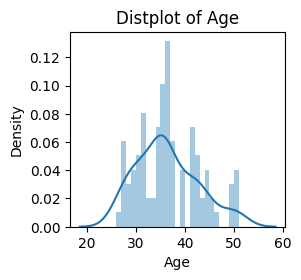

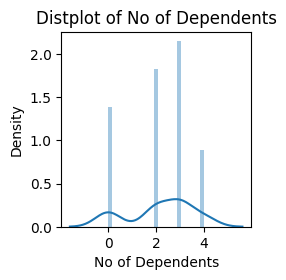

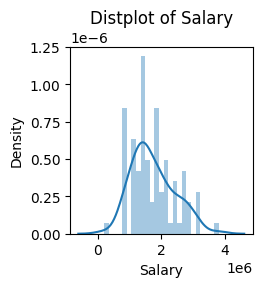

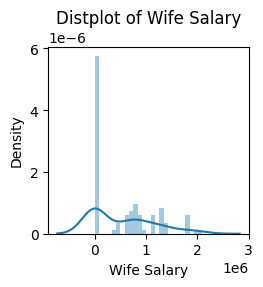

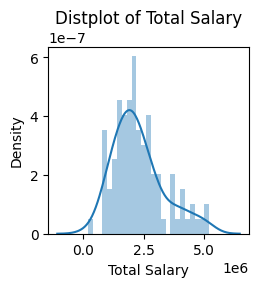

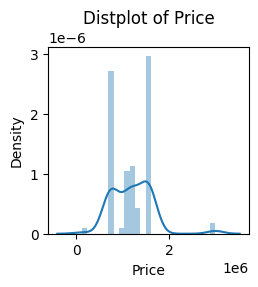

In [11]:
cols =['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
n=0
for i in cols:
  n+=1
  plt.figure(figsize=(15,5))
  plt.subplot(2,6,n)
  sns.distplot(df[i], bins=25)
  plt.title('Distplot of {}'.format(i))
  plt.tight_layout()
  plt.show()

<Axes: xlabel='count', ylabel='House Loan'>

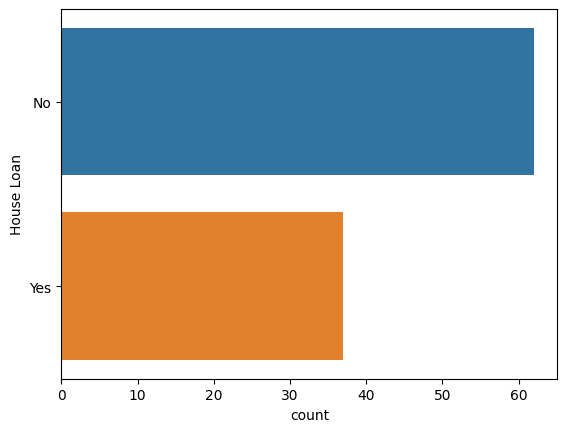

In [12]:
sns.countplot(y='House Loan',data=df)

<Axes: xlabel='count', ylabel='Make'>

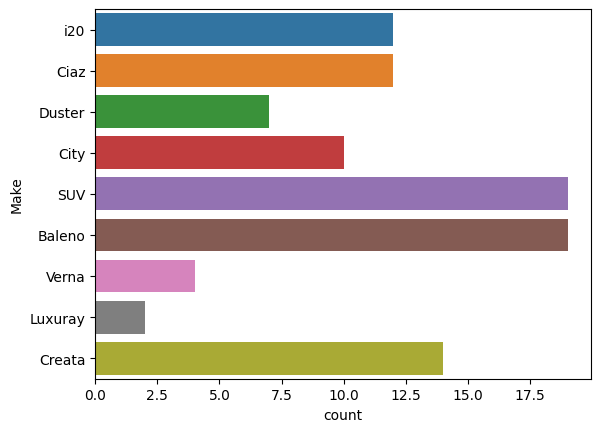

In [13]:
sns.countplot(data=df, y='Make')

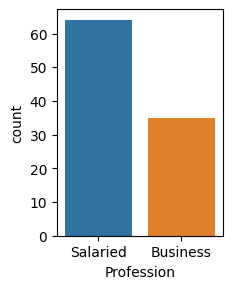

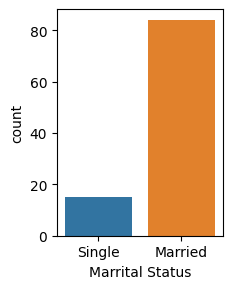

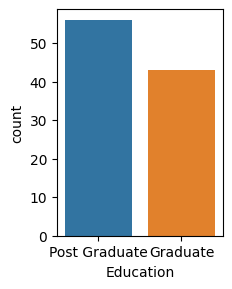

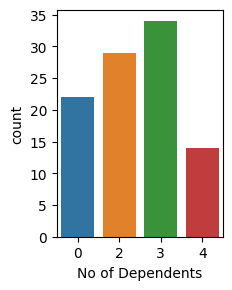

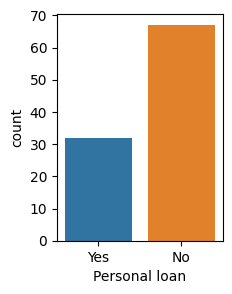

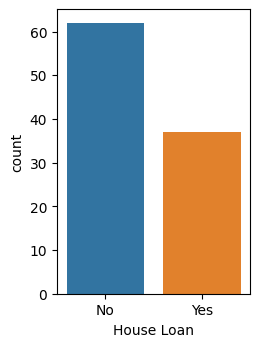

In [14]:
col=['Profession', 'Marrital Status','Education','No of Dependents','Personal loan','House Loan']

for i, x in enumerate(col, 1):
    plt.figure(figsize=(15,10))
    plt.subplot(3,6,i)
    sns.countplot(data=df, x=x)

plt.tight_layout()
plt.show()

In [15]:
df['Profession']=df['Profession'].map({'Salaried':1, 'Business':0})
df['Personal loan']=df['Personal loan'].map({'Yes':1, 'No':0})
df['Education']=df['Education'].map({'Post Graduate':1, 'Graduate':0})
df['Marrital Status']=df['Marrital Status'].map({'Single':1,'Married':0})
df['House Loan']=df['House Loan'].map({'No':0,'Yes':1})
df['Wife Working']=df['Wife Working'].map({'No':0,'Yes':1})

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Make = le.fit_transform(df.Make)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0.0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1.0,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0.0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1.0,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1.0,1800000,800000,2600000,6,1600000


In [17]:
df['Wife Working']=df['Wife Working'].fillna(df['Wife Working'].mean())

In [18]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [19]:
d=df[column]

In [20]:
from sklearn.cluster import KMeans
import wandb
run = wandb.init(project='Indian Automobile Buying Behavior Study')
config = wandb.config
config.seed = 42
config.n_clusters = 2
np.random.seed(config.seed)
wandb.config.update(config)

wandb: Currently logged in as: dishaa_s. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.12
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231018_185920-1znc60lg
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run worldly-plant-41
wandb: ⭐️ View project at https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study
wandb: 🚀 View run at https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study/runs/1znc60lg


In [21]:
kmeans = KMeans(n_clusters = config.n_clusters, random_state = config.seed)
kmeans.fit(d)
wandb.sklearn.plot_clusterer(kmeans, d, cluster_labels = kmeans.fit_predict(d), model_name='KMeans')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
wandb: 
wandb: Plotting KMeans.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.


In [22]:
run.finish()

wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run worldly-plant-41 at: https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study/runs/1znc60lg
wandb: Synced 6 W&B file(s), 2 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231018_185920-1znc60lg/logs


In [23]:
d['clusters'] = kmeans.fit_predict(d)

Text(0, 0.5, 'Total salary')

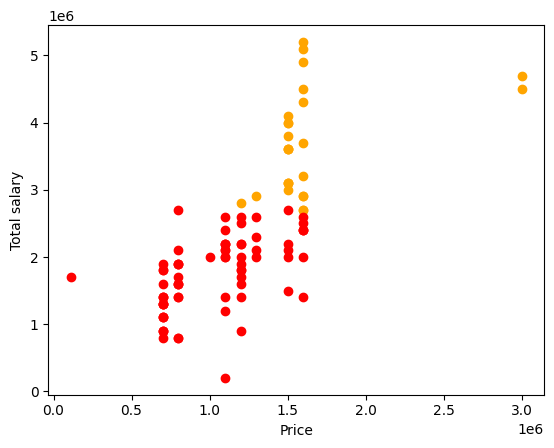

In [24]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Price, d1['Total Salary'],color='orange')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.xlabel('Price')
plt.ylabel('Total salary')

Text(0, 0.5, 'Total salary')

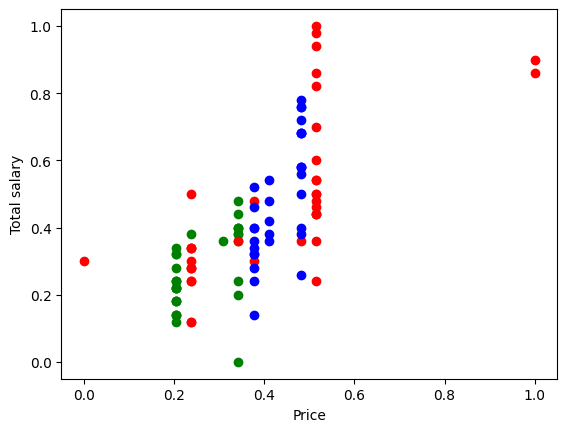

In [25]:
from sklearn.preprocessing import MinMaxScaler
x = d['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
d['Age']= x_scaled

x = d['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Salary']= x_scaled

x = d['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Wife Salary']= x_scaled


x = d['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Total Salary']= x_scaled


x = d['Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Price']= x_scaled

d['clusters'] = kmeans.fit_predict(d) 

clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d) 


d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
d2 = d[d.clusters==2]

plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.scatter(d2.Price, d2['Total Salary'],color='blue')

plt.xlabel('Price')
plt.ylabel('Total salary')

In [26]:
clustering_kmeans.cluster_centers_

array([[ 4.07567568e-01,  6.48648649e-01,  1.62162162e-01,
         6.21621622e-01,  2.13513514e+00,  2.70270270e-01,
         3.24324324e-01,  6.21621622e-01,  4.64714715e-01,
         3.47490347e-01,  4.80540541e-01,  6.70270270e+00,
         4.24950902e-01, -2.22044605e-16],
       [ 3.66451613e-01,  6.12903226e-01,  1.93548387e-01,
         4.19354839e-01,  2.16129032e+00,  5.48387097e-01,
         4.51612903e-01,  2.75181040e-01,  3.37813620e-01,
         6.29800307e-02,  2.69677419e-01,  3.87096774e-01,
         2.57729657e-01,  1.00000000e+00],
       [ 4.64516129e-01,  6.77419355e-01,  9.67741935e-02,
         6.45161290e-01,  2.25806452e+00,  1.61290323e-01,
         3.54838710e-01,  6.77419355e-01,  4.70430108e-01,
         3.34869432e-01,  4.79354839e-01,  2.90322581e+00,
         4.32972430e-01,  7.74193548e-01]])

In [27]:
k_range = range(1,10)
#sum of squared error
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(d)
  sse.append(km.inertia_)

sse

[1146.1735859688256,
 499.2088726114978,
 376.7341690615645,
 294.4338330700371,
 242.19232707434264,
 206.98822373398048,
 188.29817150597847,
 176.7489318520479,
 167.66371036708065]

In [28]:
import wandb
run = wandb.init(project='Indian Automobile Buying Behavior Study')
config = wandb.config
config.seed = 42
config.n_clusters = 2
np.random.seed(config.seed)
wandb.config.update(config)
est = KMeans(n_clusters = config.n_clusters, random_state = config.seed)
est.fit(d)
wandb.config.update({'labels' : est.cluster_centers_})
wandb.sklearn.plot_clusterer(est, d, cluster_labels = est.fit_predict(d), labels=config.labels, model_name='KMeans')
wandb.finish()

wandb: Tracking run with wandb version 0.15.12
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231018_185959-8yj7eu5n
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run apricot-wave-42
wandb: ⭐️ View project at https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study
wandb: 🚀 View run at https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study/runs/8yj7eu5n
wandb: 
wandb: Plotting KMeans.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run apricot-wave-42 at: https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study/runs/8yj7eu5n
wandb: Synced 6 W&B file(s), 2 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231018_185959-8yj7eu5n/logs


In [29]:
def plotseg(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  plt.scatter(clus[Y==2,0], clus[Y==2,1], s=10, c='black', label='Cluster 3')

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

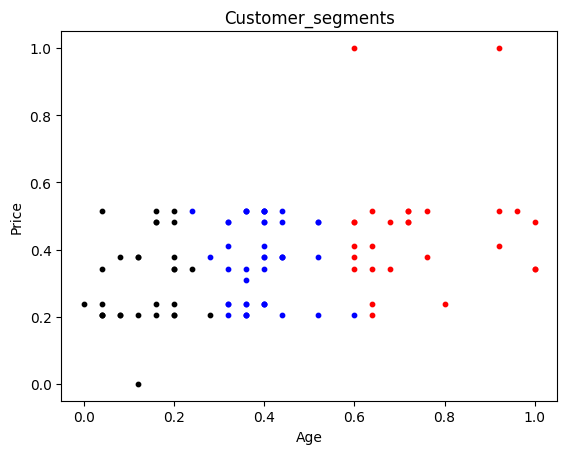

In [30]:
clus = d.loc[:,["Age","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Age","Price"]) 

In [31]:
import wandb
run = wandb.init(project='Indian Automobile Buying Behavior Study')
config = wandb.config
config.seed = 0
config.n_clusters = 2
np.random.seed(config.seed)
wandb.config.update(config)
et = KMeans(n_clusters = config.n_clusters, random_state = config.seed)
et.fit(d)
wandb.config.update({'labels' : et.cluster_centers_})
wandb.sklearn.plot_clusterer(et, d, cluster_labels = et.fit_predict(d), labels=config.labels, model_name='KMeans')
wandb.finish()

wandb: Tracking run with wandb version 0.15.12
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231018_190035-2412jpjj
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run cool-sun-43
wandb: ⭐️ View project at https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study
wandb: 🚀 View run at https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study/runs/2412jpjj
wandb: 
wandb: Plotting KMeans.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run cool-sun-43 at: https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study/runs/2412jpjj
wandb: Synced 6 W&B file(s), 2 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231018_190035-2412jpjj/logs


In [32]:
clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d) 

In [33]:
labels = clustering_kmeans.labels_

In [34]:
labels

array([1, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2,
       1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2,
       2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0], dtype=int32)

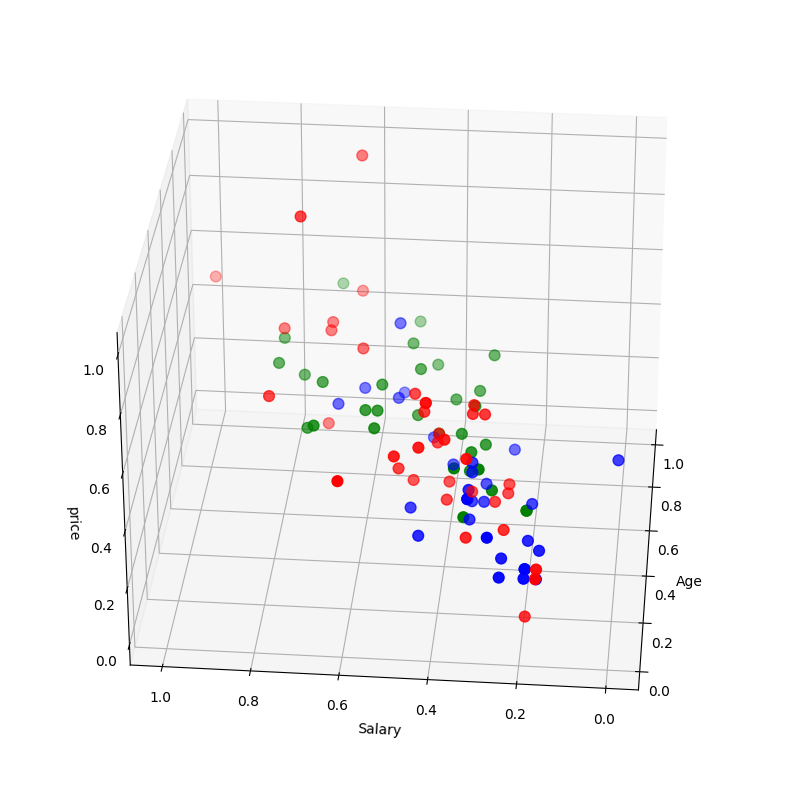

In [35]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Salary"][labels == 0], d["Price"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Salary"][labels == 1], d["Price"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

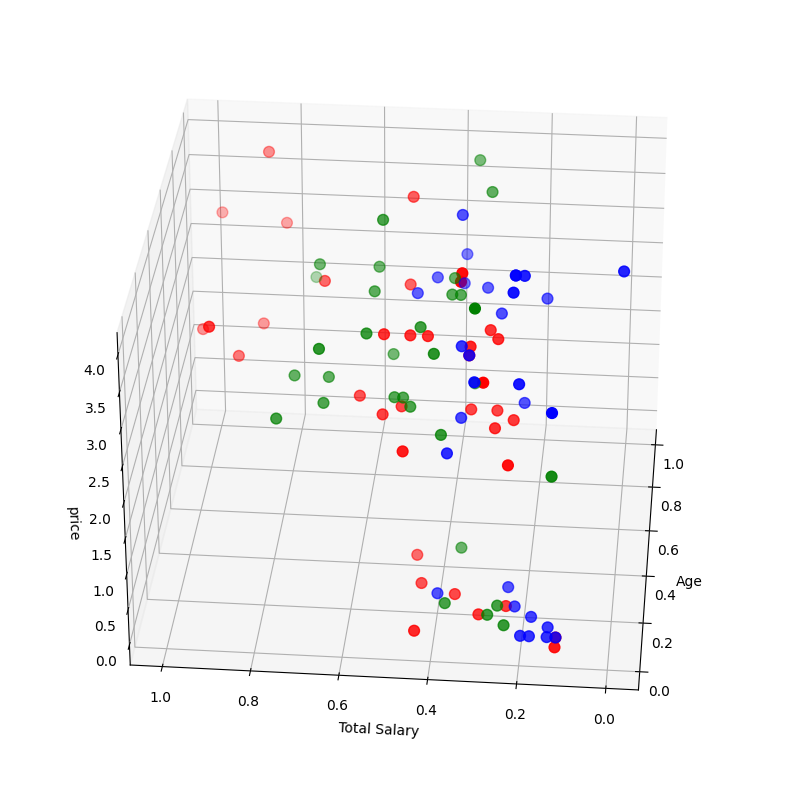

In [36]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Total Salary"][labels == 0], d["No of Dependents"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Total Salary"][labels == 1], d["No of Dependents"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Total Salary"][labels == 2], d["No of Dependents"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('price')
plt.show()

In [37]:
feature = list(df.columns)
dc = df[feature] 

In [38]:
dc

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0.0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1.0,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0.0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1.0,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1.0,1800000,800000,2600000,6,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0.0,2400000,0,2400000,6,1600000
95,50,1,0,1,3,0,0,1.0,3800000,1300000,5100000,6,1600000
96,51,0,0,0,2,1,1,0.0,2200000,0,2200000,1,1100000
97,51,1,0,1,2,0,0,1.0,2700000,1300000,4000000,3,1500000


In [39]:
x = dc['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Salary']= x_scaled


x = dc['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
dc['Age']= x_scaled


x = dc['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Wife Salary']= x_scaled


x = dc['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Total Salary']= x_scaled


dc

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,0.04,1,1,1,0,1,0,0.0,0.166667,0.000000,0.12,8,800000
1,0.36,1,0,1,2,1,1,1.0,0.333333,0.285714,0.36,1,1000000
2,0.76,0,0,0,4,1,1,0.0,0.444444,0.000000,0.32,4,1200000
3,0.60,0,0,1,3,0,0,1.0,0.388889,0.285714,0.40,2,1200000
4,0.20,1,0,1,2,1,0,1.0,0.444444,0.380952,0.48,6,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0.0,0.611111,0.000000,0.44,6,1600000
95,0.96,1,0,1,3,0,0,1.0,1.000000,0.619048,0.98,6,1600000
96,1.00,0,0,0,2,1,1,0.0,0.555556,0.000000,0.40,1,1100000
97,1.00,1,0,1,2,0,0,1.0,0.694444,0.619048,0.76,3,1500000


In [40]:
import wandb
run = wandb.init(project='Indian Automobile Buying Behavior Study')
config = wandb.config
config.seed = 42
config.n_clusters = 3
np.random.seed(config.seed)
wandb.config.update(config)
e = KMeans(n_clusters = config.n_clusters, random_state = config.seed)
e.fit(dc)
wandb.config.update({'labels' : e.cluster_centers_})
wandb.sklearn.plot_clusterer(e, dc, cluster_labels = e.fit_predict(dc), labels=config.labels, model_name='KMeans')
wandb.finish()

wandb: Tracking run with wandb version 0.15.12
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231018_190113-edmu8dvq
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run resilient-lion-44
wandb: ⭐️ View project at https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study
wandb: 🚀 View run at https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study/runs/edmu8dvq
wandb: 
wandb: Plotting KMeans.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run resilient-lion-44 at: https://wandb.ai/dishaa_s/Indian%20Automobile%20Buying%20Behavior%20Study/runs/edmu8dvq
wandb: Synced 6 W&B file(s), 2 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231018_190113-edmu8dvq/logs


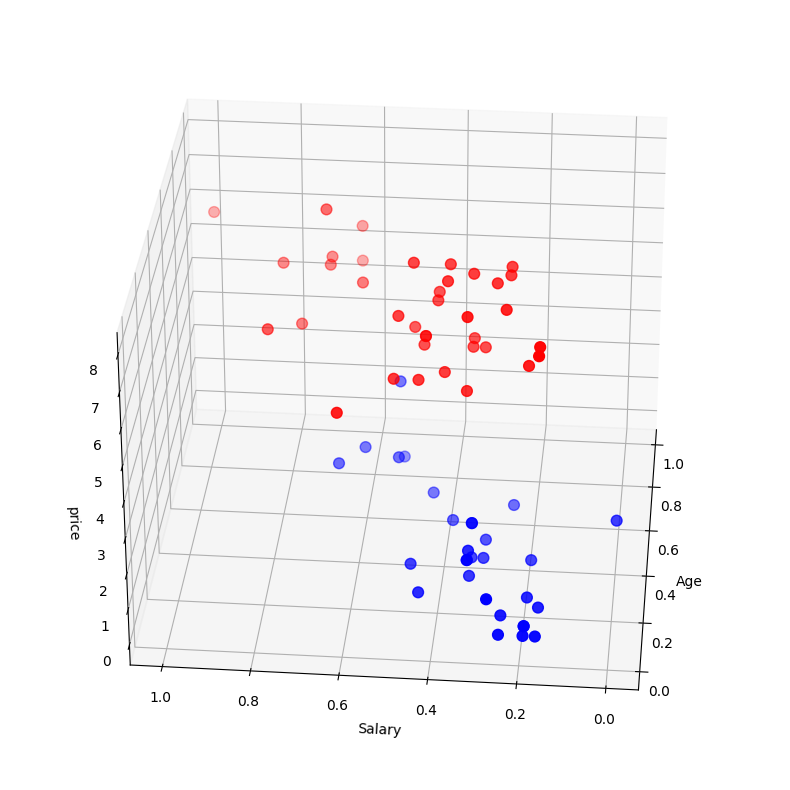

In [41]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dc.Age[labels == 0], dc["Salary"][labels == 0], dc["Make"][labels == 0],  c='blue', s=60)
ax.scatter(dc.Age[labels == 1], dc["Salary"][labels == 1], dc["Make"][labels == 1],  c='red', s=60)
#ax.scatter(dc.Age[labels == 2], dc["Salary"][labels == 2], dc["Make"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

In [42]:
p=d[d.clusters==1]
p.shape

(37, 14)

In [43]:
q=d[d.clusters==0]
q.shape

(31, 14)

In [44]:
r=d[d.clusters==2]
r.shape

(31, 14)